In [1]:
import pandas as pd
import geopandas as gpd
import os, sys
import numpy as np
from matplotlib import pyplot as plt



In [2]:
## look at hurrican wilma

In [3]:
# slosh = 'SLOSH_Innundation_Data/Inundation_polygons/Polygon_Cat1_outline.shp'
# gdf = gpd.read_file(slosh)
# gdf.plot()

In [4]:
# neighborhood csv... join regionID from neighborhood polygons to medianHousePricePerSqFt csv file
#neigh_shp = 'Neighborhoods/Neighborhood_polygons/PanhandleFl_Neigh_proj.shp'
zillow_csv = 'Zillow_Data/Zillow_Neighborhood_Data/Neighborhood_MedianValuePerSqft_AllHomes.csv'
neigh_shp = 'Neighborhoods/PanFl_Neigh_WithDistance.shp'

neigh_df = gpd.read_file(neigh_shp)
zillow_df = pd.read_csv(zillow_csv)

In [5]:
neigh_df.head()

,State,County,City,Name,RegionID,NEAR_FID,NEAR_DIST,geometry
0,FL,Orange,Orlando,Alafaya,15046,33846,20353.791610,"POLYGON ((1455291.559658508 714284.254792735, ..."
1,FL,Broward,Hollywood,Hillcrest,25125,34917,4363.193135,"POLYGON ((1589487.493421007 459691.2616779506,..."
2,FL,Miami-Dade,Miami,Brickell,55477,34997,0.000000,"POLYGON ((1593401.634173049 435138.7320546452,..."
3,FL,Pasco,New Port Richey,North Park,116942,5201,488.849583,"POLYGON ((1303881.935526199 667939.7120311093,..."
4,FL,Volusia,New Smyrna Beach,South West,121790,33325,286.567972,"POLYGON ((1463240.95545853 776744.8219052199, ..."


In [6]:
zillow_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas,1,70.0,71.0,71.0,...,161,163,166,169,170,172,173,173,174,175
1,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark,2,74.0,74.0,74.0,...,139,141,144,145,147,149,151,153,155,157
2,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York,3,285.0,287.0,289.0,...,1508,1503,1505,1504,1507,1514,1511,1496,1487,1485
3,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,4,96.0,96.0,97.0,...,348,353,358,362,363,365,367,369,371,374
4,270957,Upper East Side,New York,NY,New York-Newark-Jersey City,New York,5,326.0,326.0,327.0,...,1401,1398,1402,1405,1412,1422,1421,1407,1396,1390


In [7]:
## see how many regionIDs are in neigh_df
neigh_df['RegionID'].unique().shape

(1050,)

In [8]:
# join zillow_df to neigh_df by RegionID

# help(neigh_df.join)
join_df = neigh_df.join(zillow_df, on='RegionID', how='left', lsuffix='_nbrhd')

In [9]:
join_df.shape, neigh_df.shape, zillow_df.shape

((1050, 285), (1050, 8), (7538, 277))

In [10]:
neigh_df['RegionID'].dtype, zillow_df['RegionID'].dtype

(dtype('O'), dtype('int64'))

In [11]:
## the data type of RegionID is Object for neighborhood, and Int64. need to change data type of RegionID column in neigh
neigh_df[['RegionID']] = neigh_df[['RegionID']].apply(pd.to_numeric)
# neigh_df[['RegionID']] = neigh_df[['RegionID']].astype('int64') # this would explicitly change it to int64
neigh_df['RegionID'].dtype

dtype('int64')

In [12]:
## now we can join the dataframes by RegionID by using pd.merge
join_df = neigh_df.merge(zillow_df, on='RegionID') # , how='outer', lsuffix='_nbrhd')
join_df.shape, neigh_df.shape, zillow_df.shape

((408, 284), (1050, 8), (7538, 277))

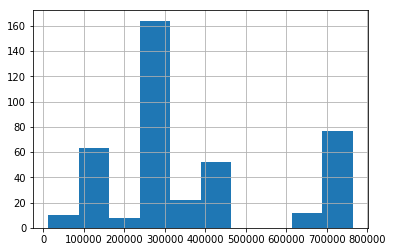

In [13]:
join_df['RegionID'].hist()

In [14]:
common_ids = list(set(neigh_df['RegionID']).intersection(zillow_df['RegionID']))
len(common_ids)

408

In [15]:
join_df['2010-08'].dropna().shape
join_df.dropna().shape

(392, 284)

In [16]:
region_id_groups_nonan = join_df.dropna().groupby('RegionID')

In [18]:
join_df = join_df.dropna()

In [19]:
join_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 392 entries, 0 to 407
Columns: 284 entries, State_x to 2018-09
dtypes: float64(226), int64(48), object(10)
memory usage: 872.8+ KB


In [20]:
for i,col in enumerate(join_df.columns):
    print(i, col)

0 State_x
1 County
2 City_x
3 Name
4 RegionID
5 NEAR_FID
6 NEAR_DIST
7 geometry
8 RegionName
9 City_y
10 State_y
11 Metro
12 CountyName
13 SizeRank
14 1996-04
15 1996-05
16 1996-06
17 1996-07
18 1996-08
19 1996-09
20 1996-10
21 1996-11
22 1996-12
23 1997-01
24 1997-02
25 1997-03
26 1997-04
27 1997-05
28 1997-06
29 1997-07
30 1997-08
31 1997-09
32 1997-10
33 1997-11
34 1997-12
35 1998-01
36 1998-02
37 1998-03
38 1998-04
39 1998-05
40 1998-06
41 1998-07
42 1998-08
43 1998-09
44 1998-10
45 1998-11
46 1998-12
47 1999-01
48 1999-02
49 1999-03
50 1999-04
51 1999-05
52 1999-06
53 1999-07
54 1999-08
55 1999-09
56 1999-10
57 1999-11
58 1999-12
59 2000-01
60 2000-02
61 2000-03
62 2000-04
63 2000-05
64 2000-06
65 2000-07
66 2000-08
67 2000-09
68 2000-10
69 2000-11
70 2000-12
71 2001-01
72 2001-02
73 2001-03
74 2001-04
75 2001-05
76 2001-06
77 2001-07
78 2001-08
79 2001-09
80 2001-10
81 2001-11
82 2001-12
83 2002-01
84 2002-02
85 2002-03
86 2002-04
87 2002-05
88 2002-06
89 2002-07
90 2002-08
91 20

In [21]:
join_df[join_df.columns[14:]].shape

(392, 270)

In [22]:
## subset by a city name
city_df = join_df.loc[join_df['City_x'] == 'Naples']
city_df.shape

(11, 284)

In [23]:
city_df

,State_x,County,City_x,Name,RegionID,NEAR_FID,NEAR_DIST,geometry,RegionName,City_y,...,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09
26,FL,Collier,Naples,Naples Park,125397,8417,15.312681,"POLYGON ((1423118.287640546 463781.530995667, ...",Naples Park,Naples,...,251,252,256,261,263,265,267,269,271,271
32,FL,Collier,Naples,Port Royal,125840,8431,0.000000,"POLYGON ((1427588.260330413 447763.5536953434,...",Port Royal,Naples,...,1352,1378,1420,1440,1446,1474,1507,1519,1529,1538
61,FL,Collier,Naples,Pelican Bay,125698,8417,0.000000,"POLYGON ((1425628.363430634 458652.1395102665,...",Pelican Bay,Naples,...,451,454,462,469,473,478,484,489,493,494
166,FL,Collier,Naples,Moorings,274586,8423,0.000000,"POLYGON ((1425944.344446902 455239.2149288468,...",Moorings,Naples,...,478,479,485,489,490,491,496,499,502,503
189,FL,Collier,Naples,Aqualane Shore,276185,8427,0.000000,"POLYGON ((1427765.288350504 448825.7527662031,...",Aqualane Shore,Naples,...,1014,1017,1016,1010,1009,1018,1031,1037,1046,1054
203,FL,Collier,Naples,Old Naples,274885,8423,0.000000,"POLYGON ((1427016.627223593 451838.5084135234,...",Old Naples,Naples,...,586,590,596,599,599,599,594,587,587,591
229,FL,Collier,Naples,Park Shore,276507,8423,0.000000,"POLYGON ((1425797.876329795 457650.6625145506,...",Park Shore,Naples,...,585,583,582,581,581,582,586,590,592,593
241,FL,Collier,Naples,Coquina Sands,417053,8423,0.000000,"POLYGON ((1426635.942402419 452916.7715741657,...",Coquina Sands,Naples,...,508,514,531,542,544,546,553,562,570,575
242,FL,Collier,Naples,Royal Harbor,417055,8429,0.000000,"POLYGON ((1429050.05443495 449722.3970517237, ...",Royal Harbor,Naples,...,455,456,463,470,472,472,474,476,482,487
247,FL,Collier,Naples,Lake Park,274237,8428,44.077267,"POLYGON ((1427467.489975066 452822.7596585695,...",Lake Park,Naples,...,329,333,343,356,363,366,367,369,372,375


Text(0.5,1,'median home value per sq ft')

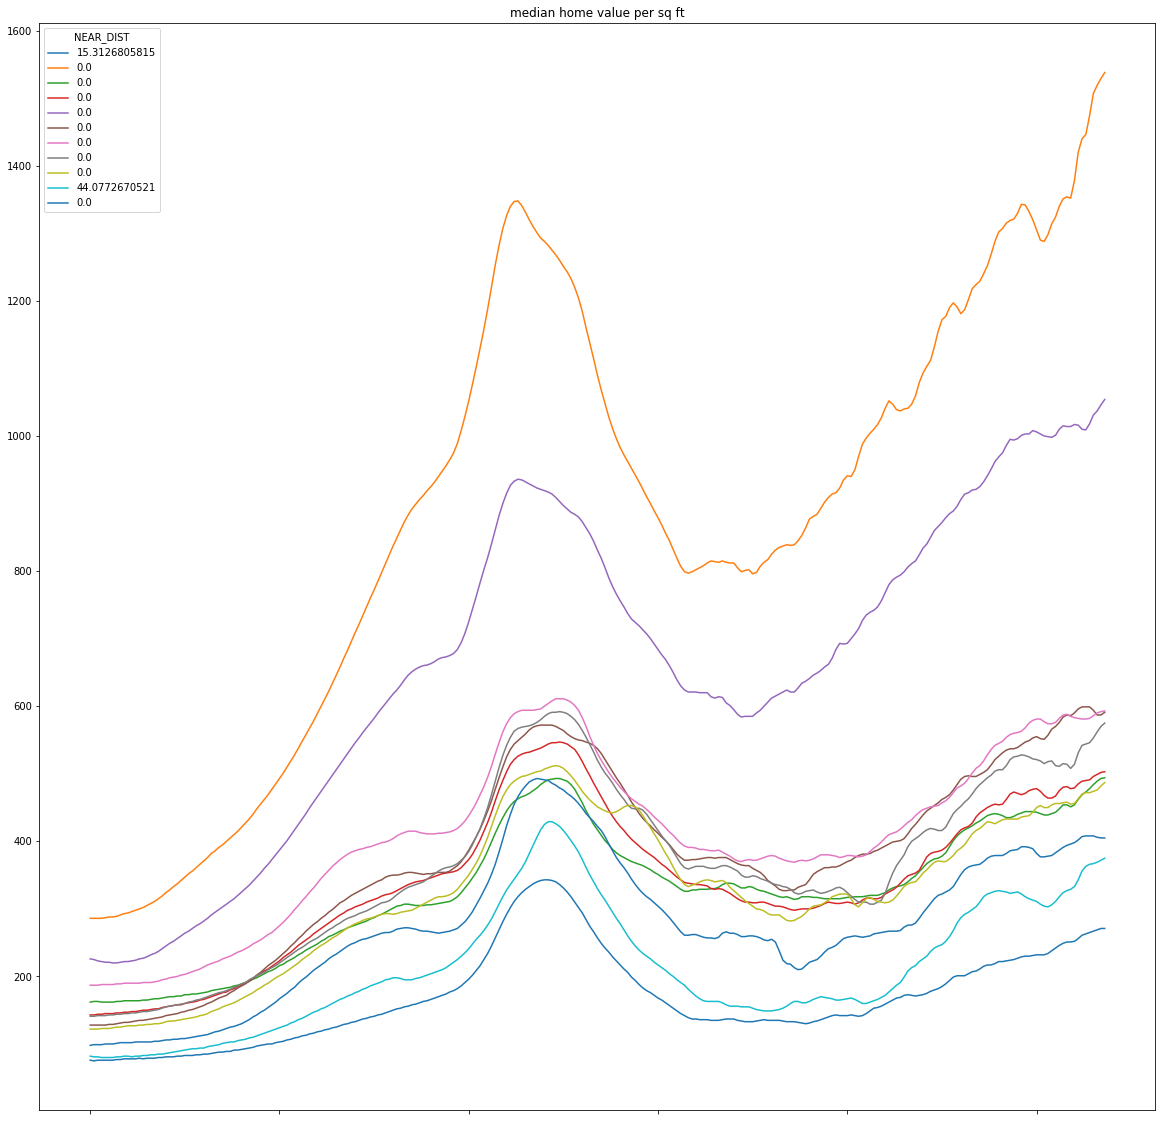

In [24]:
city_name_df = city_df.set_index('NEAR_DIST')

xtick_ls = list(city_name_df.columns[14:].values)
plot_df = city_name_df[city_name_df.columns[14:]].T
plot_df.plot(figsize=(20,20))#, xticks=xtick_ls)
plt.title('median home value per sq ft')

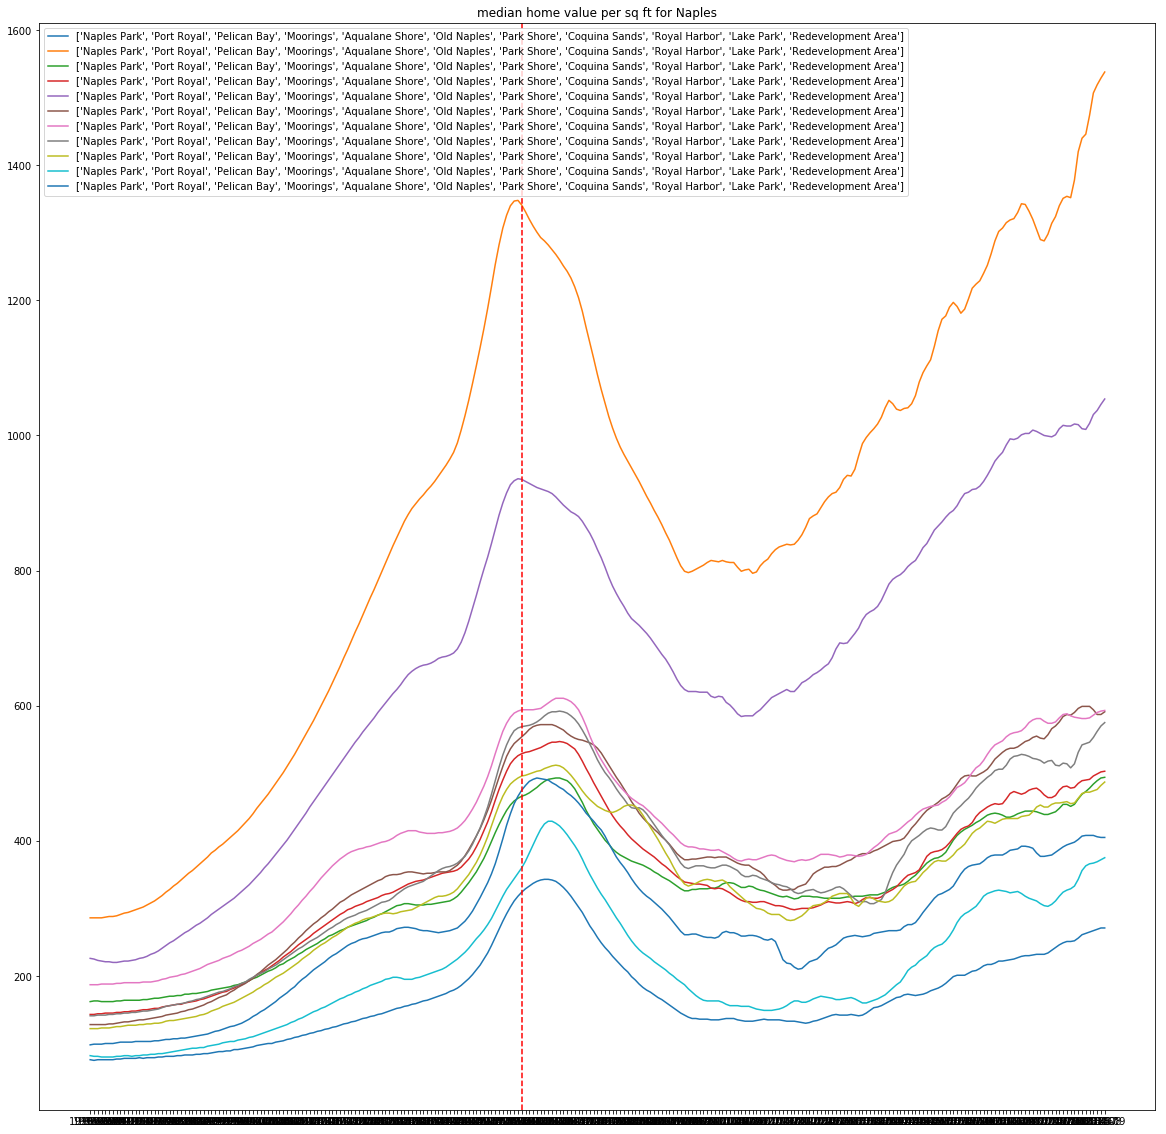

In [180]:
# make the plot
fig,ax = plt.subplots(figsize=(20,20))
labels = list(plot_df.columns)
ax.plot(plot_df, label=labels) # plot the nupy array not the dataframe
plt.axvline(x='2005-11', color='r', linestyle='--')
plt.title('median home value per sq ft for Naples')
plt.legend()
plt.show()

In [176]:
list(plot_df.columns)

['Naples Park',
 'Port Royal',
 'Pelican Bay',
 'Moorings',
 'Aqualane Shore',
 'Old Naples',
 'Park Shore',
 'Coquina Sands',
 'Royal Harbor',
 'Lake Park',
 'Redevelopment Area']

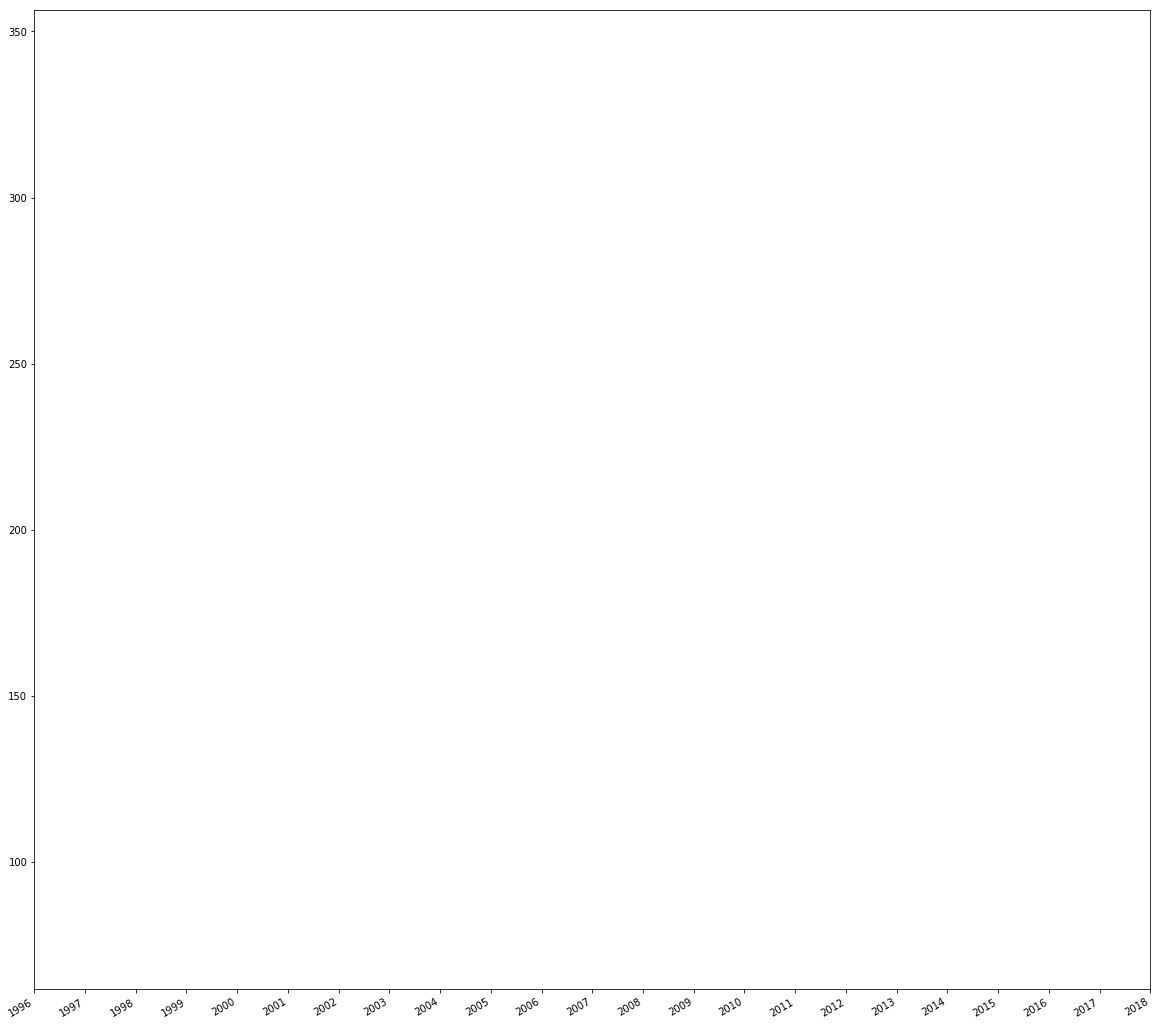

In [155]:
# make a plot that has date on x axis
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')


# make the plot
fig,ax = plt.subplots(figsize=(20,20))
ax.plot(plot_df.values[:,0]) # plot the nupy array not the dataframe


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
# ax.xaxis.set_minor_locator(months)

# round to nearest years...
date_list = list(city_name_df.columns[14:].values)
datemin = np.datetime64(date_list[0], 'Y')
datemax = np.datetime64(date_list[-1], 'Y') + np.timedelta64(1, 'Y')
datemax = np.datetime64('2018', 'Y')
temp = ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_xdata = mdates.DateFormatter('%Y')

# plt.xticks(rotation=70)
# plt.legend()

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [157]:
temp[1] - temp[0]

8036.0

In [147]:
years

In [158]:
plot_df.head()

Name,Naples Park,Port Royal,Pelican Bay,Moorings,Aqualane Shore,Old Naples,Park Shore,Coquina Sands,Royal Harbor,Lake Park,Redevelopment Area
1996-05,76.0,286.0,162.0,143.0,226.0,128.0,187.0,141.0,122.0,82.0,98.0
1996-06,75.0,286.0,163.0,143.0,225.0,128.0,187.0,141.0,122.0,81.0,99.0
1996-07,76.0,286.0,163.0,144.0,223.0,128.0,187.0,142.0,122.0,81.0,99.0
1996-08,76.0,286.0,162.0,144.0,222.0,128.0,188.0,142.0,123.0,80.0,99.0
1996-09,76.0,287.0,162.0,145.0,221.0,128.0,188.0,142.0,123.0,80.0,100.0


In [159]:
plot_df.shape

(269, 11)